# 📊 Exploratory Data Analysis on Iris Dataset

**Prepared by:** G. Madhura  

---

## 1. Introduction

The Iris dataset contains 150 samples of three species of iris flowers — setosa, versicolor, and virginica.  
Each sample has four features: sepal length, sepal width, petal length, and petal width.  
My goal is to explore the dataset, clean it, analyze it, and visualize the patterns using Python libraries like Pandas, Matplotlib, and Seaborn.


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Loading the Dataset

We load the Iris dataset using Seaborn's built-in function and display the first few rows to understand the structure of the data.


In [3]:
# Load the dataset
df = sns.load_dataset('iris')

# Display first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Basic Information

We check:  
- Shape of the dataset  
- Data types  
- Summary statistics  
- Missing values  


In [4]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Data types and null values
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (150, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.80000

# 4. Data Cleaning

The Iris dataset is already clean with no missing values or obvious errors.  
We still check for duplicates and remove them if found.


In [8]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


# 5. Filtering Example

Filter rows where sepal_length > 6 cm.  
This demonstrates how to extract a subset of data based on conditions.


In [9]:
# Filter rows where sepal_length > 6
filtered_df = df[df['sepal_length'] > 6]
filtered_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor


# 6. Grouping Example

Group data by species and calculate mean for each feature.  
This helps compare average measurements across species.


In [10]:
# Group by species and calculate mean
grouped_df = df.groupby('species').mean()
grouped_df


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


# 7. Sorting Example

Sort dataset by petal_length in descending order to see the largest petals.


In [11]:
# Sort by petal_length
sorted_df = df.sort_values(by='petal_length', ascending=False)
sorted_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica


# 8. Counting Example

Count number of samples for each species.


In [12]:
# Count species
species_count = df['species'].value_counts()
species_count


setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

# 9. Visualizations

We create plots to understand feature distributions, relationships, and correlations.


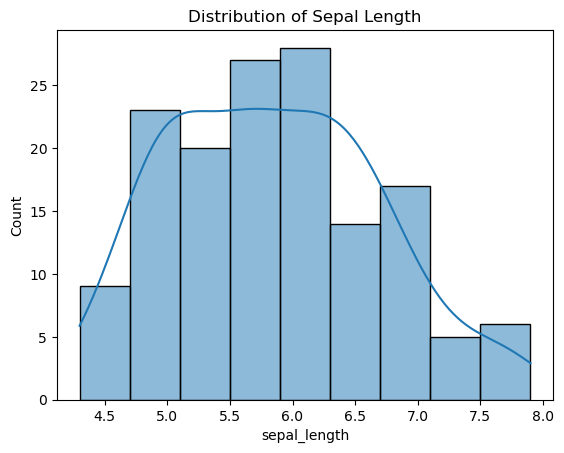

In [13]:
# 1. Distribution plot for Sepal Length
sns.histplot(df['sepal_length'], kde=True)
plt.title("Distribution of Sepal Length")
plt.show()

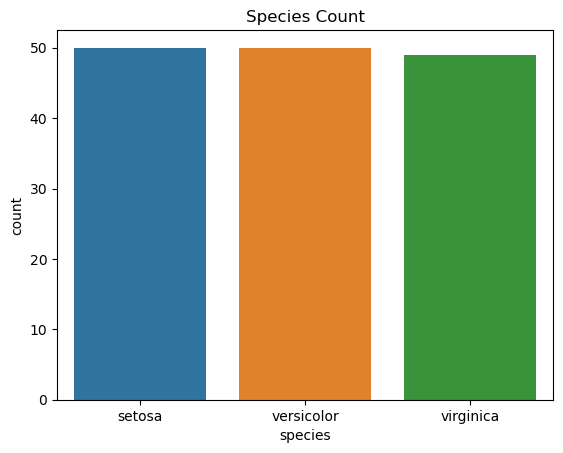

In [14]:
# 2. Count plot for species
sns.countplot(x='species', data=df)
plt.title("Species Count")
plt.show()

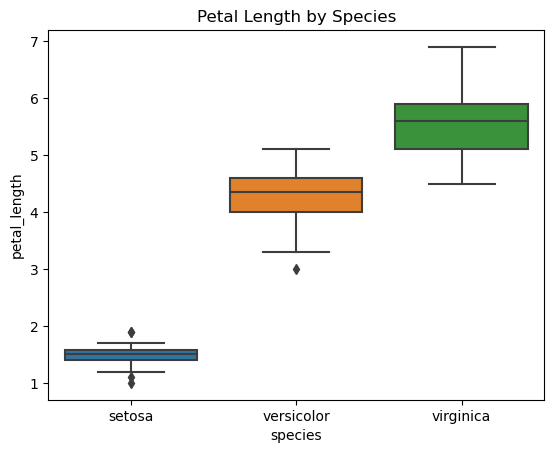

In [15]:
# 3. Boxplot for Petal Length by Species
sns.boxplot(x='species', y='petal_length', data=df)
plt.title("Petal Length by Species")
plt.show()

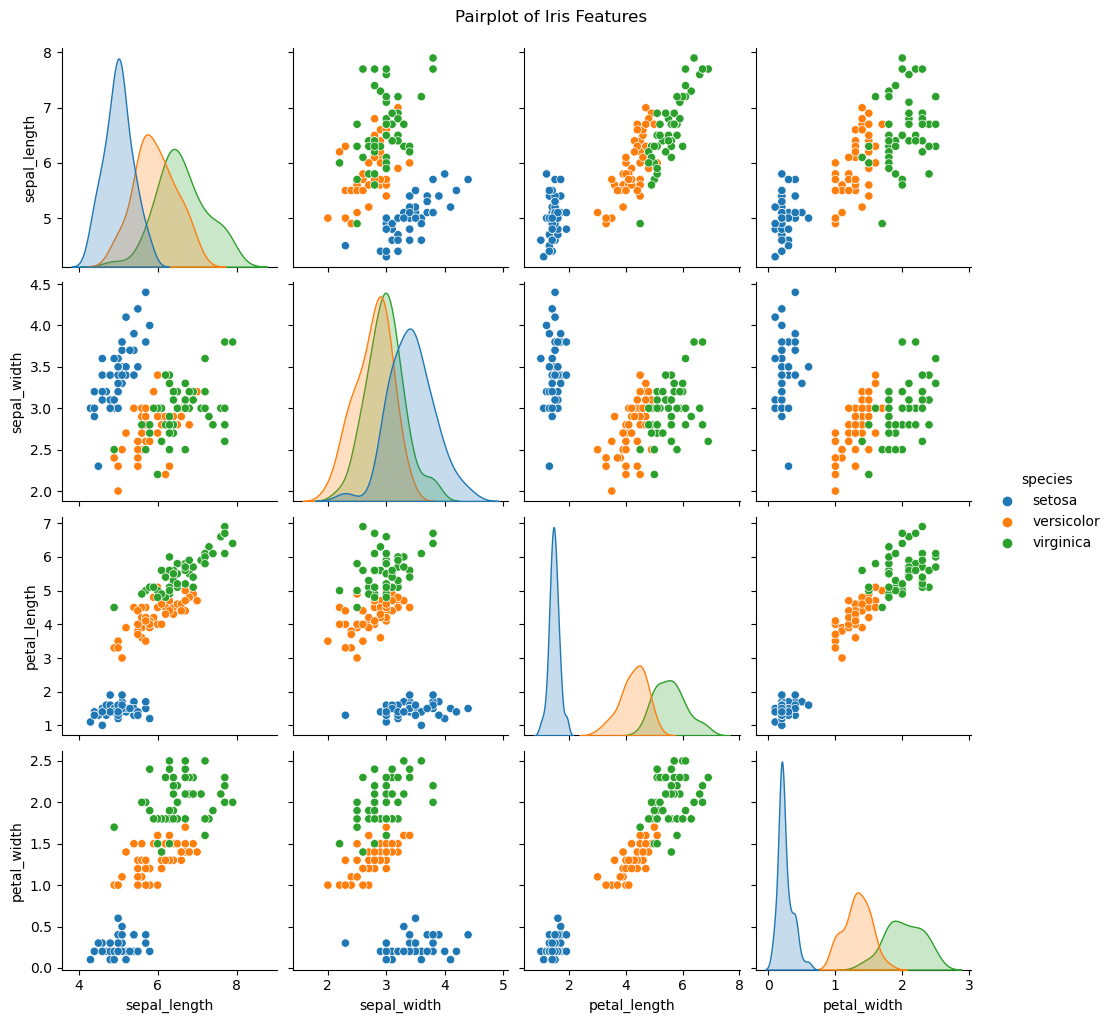

In [16]:
# 4. Pairplot for all features
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

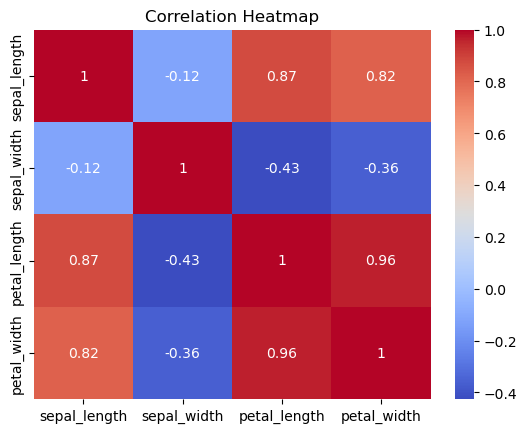

In [17]:
# 5. Correlation heatmap
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 10. Summary & Observations

- Dataset has 150 samples across 3 species (50 each).  
- No missing values found.  
- Sepal length > 6 cm is more common in Virginica species.  
- Petal length is the most distinguishing feature between species.  
- Strong correlation between petal length and petal width.  
